<a href="https://colab.research.google.com/github/garylau1/model_training/blob/main/Visiontransformer_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Weather Classification Using Vision Transformer

Weather classification is an important task in computer vision with applications ranging from agriculture and transportation to outdoor event planning. In this project, I aim to design and implement a Vision Transformer (ViT) from scratch to classify weather into four distinct categories: sunrise, cloudy, rainy, and shrine. The dataset utilized for this task is the Multi-class Weather Dataset, which provides a diverse collection of images representing these weather conditions.

Here is the link of the dataset (from kaggle): https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

The project not only focuses on building the Vision Transformer architecture but also involves the development of encoders and handling custom datasets. By tackling this project, I aim to explore the intricate workings of transformers in vision tasks, showcasing their ability to capture spatial and contextual information for robust classification. This hands-on approach allows me to deepen my understanding of advanced neural architectures while addressing a real-world problem in weather prediction.

Also we will inprove the result by using the exact same transformer model with pretrained weights.

### Data Processing

The data preprocessing step is a critical part of this project to ensure the Vision Transformer model receives high-quality input for effective learning. The dataset for this project, the Multi-class Weather Dataset, will be customized to better suit the classification task and improve model performance.

To create a clean and consistent dataset, I will first inspect the data for any anomalies or irregularities. During this process, I identified six data points with incorrect shapes that do not conform to the expected input dimensions. These outliers will be removed to maintain the integrity of the dataset and avoid potential issues during training.

Additionally, the dataset will be standardized in terms of image size and format to ensure uniformity. All images will be resized to a fixed resolution compatible with the Vision Transformer model, and normalization techniques will be applied to scale the pixel values for better numerical stability during training. By carefully curating and preprocessing the dataset, I aim to establish a robust foundation for the model's learning process, maximizing its ability to classify weather conditions accurately.

In [1]:
import torch
import torchvision

import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

import requests
import zipfile
from pathlib import Path
import pathlib
from PIL import Image
import random
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader
import os
from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"


# 1. Get data
from pathlib import Path
import requests
import zipfile


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil

# Define the source and destination paths
source_path = '/content/drive/MyDrive/archive1.zip'
destination_path = '/content/'

# Copy the file
shutil.copy(source_path, destination_path)
print("File copied to /content successfully!")



File copied to /content successfully!


In [4]:
!unzip /content/archive1.zip

Archive:  /content/archive1.zip
  inflating: Multi-class Weather Dataset/Cloudy/cloudy1.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy10.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy100.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy101.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy102.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy103.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy104.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy105.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy106.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy107.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy108.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy109.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy11.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy110.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy111.jpg  
  inflating:

In [5]:
import requests
import zipfile
from pathlib import Path
import pathlib
from PIL import Image
import random
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader
import os
from pathlib import Path


Imagepath=("/content/Multi-class Weather Dataset")

#create a function to check the nums of images in each classes
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir("/content/Multi-class Weather Dataset")

#remove shine 127
#remove cloudy46.
#cloudy66
#rain141
#shine131.




There are 4 directories and 0 images in '/content/Multi-class Weather Dataset'.
There are 0 directories and 300 images in '/content/Multi-class Weather Dataset/Cloudy'.
There are 0 directories and 357 images in '/content/Multi-class Weather Dataset/Sunrise'.
There are 0 directories and 253 images in '/content/Multi-class Weather Dataset/Shine'.
There are 0 directories and 215 images in '/content/Multi-class Weather Dataset/Rain'.


In [7]:
#we remove 6 files which has single channels only.
import os
os.remove("/content/Multi-class Weather Dataset/Shine/shine127.jpg")
os.remove("/content/Multi-class Weather Dataset/Cloudy/cloudy46.jpg")
os.remove("/content/Multi-class Weather Dataset/Cloudy/cloudy66.jpg")
os.remove("/content/Multi-class Weather Dataset/Rain/rain141.jpg")
os.remove("/content/Multi-class Weather Dataset/Shine/shine131.jpg")
os.remove("/content/Multi-class Weather Dataset/Cloudy/cloudy71.jpg")

In [8]:
walk_through_dir("/content/Multi-class Weather Dataset")

There are 4 directories and 0 images in '/content/Multi-class Weather Dataset'.
There are 0 directories and 297 images in '/content/Multi-class Weather Dataset/Cloudy'.
There are 0 directories and 357 images in '/content/Multi-class Weather Dataset/Sunrise'.
There are 0 directories and 251 images in '/content/Multi-class Weather Dataset/Shine'.
There are 0 directories and 214 images in '/content/Multi-class Weather Dataset/Rain'.


In [9]:
# Use ImageFolder to create dataset(s)

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])


from torchvision import datasets


import os
import pandas as pd
from torchvision.io import read_image



class customdataset(Dataset):
    """
    A custom dataset class for PyTorch that loads images from a directory structure
    where each class of images is stored in a subfolder.

    Attributes:
        transform (callable): A function/transform to apply to the images.
        path (list): A sorted list of all image file paths in the dataset.
        class_name (list): A list of all class names (subfolder names).
        index (dict): A mapping of class names to integer indices.
    """

    def __init__(self, paths, transform):
        """
        Initializes the dataset by loading image paths and class information.

        Args:
            paths (str): Path to the root directory containing subdirectories of images.
            transform (callable): A function/transform to apply to the images.
        """
        # Store the transform to be applied to images.
        self.transfrom = transform

        # Gather all image file paths (.jpg) from the directory and sort them.
        self.path = sorted(list(Path(paths).glob("*/*.jpg")))

        # Get the names of the subdirectories, which represent class names.
        self.class_name = [i.name for i in os.scandir(paths)]

        # Create a mapping of class names to integer indices for labels.
        self.index = {j: i for i, j in enumerate(self.class_name)}

    def __len__(self):
        """
        Returns the total number of images in the dataset.

        Returns:
            int: The number of images.
        """
        # Return the length of the path list (number of images).
        return len(self.path)

    def __getitem__(self, idx):
        """
        Fetches the image and its corresponding label by index.

        Args:
            idx (int): Index of the desired image.

        Returns:
            tuple: Transformed image and its class label index.
        """
        # Get the image path at the specified index.
        image_idx = self.path[idx]

        # Open the image using PIL.
        PIL_image = Image.open(image_idx)

        # Apply the specified transform to the image.
        transformed = self.transfrom(PIL_image)

        # Extract the class name from the image path's parent directory.
        class_name_id = self.path[idx].parent.name

        # Return the transformed image and its label index.
        return transformed, self.index[class_name_id]

    def classes(self):
        """
        Returns the list of class names.

        Returns:
            list: Class names corresponding to subdirectory names.
        """
        # Return the class names.
        return self.class_name

    def shownimage(self, idx):
        """
        Displays the raw image at the specified index without transformations.

        Args:
            idx (int): Index of the desired image.

        Returns:
            PIL.Image.Image: The image loaded from disk.
        """
        # Get the image path at the specified index.
        image_idx = self.path[idx]

        # Open and return the image using PIL.
        return Image.open(image_idx)



dataset = customdataset(paths="/content/Multi-class Weather Dataset", # target folder of images
                                  transform=data_transform # transforms to perform on data (images)
                                  ) # transforms to perform on labels (if necessary)

train_data, test_data = torch.utils.data.random_split(dataset, [0.8, 0.2])
class_names=dataset.classes()

#print out the length of the datas and the classes
len(train_data),len(test_data),class_names


(893, 223, ['Cloudy', 'Sunrise', 'Shine', 'Rain'])

In [10]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b587967d8d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b5879f0c9d0>)

In [11]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

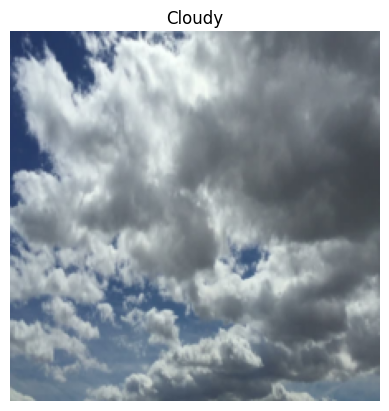

In [12]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

### Transformer with images:

- we need to turn break down the image into a sequence of image patches embeeding and position embedding.

$$
\begin{aligned}
\mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D}
\end{aligned}
$$

Each convolutional kernel will be of size (patch_size x patch_size) or if patch_size=16, (16 x 16) (the equivalent of one whole patch).

And each step or stride of the convolutional kernel will be patch_size pixels long or 16 pixels long (equivalent of stepping to the next patch).





In [13]:
# Create example values
height = 224 # H ("The training resolution is 224.")
width = 224 # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)

# Input shape (this is the size of a single image)
embedding_layer_input_shape = (height, width, color_channels)

# Output shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)
Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196


In [14]:
from torch import nn


# Pass the image through the convolutional layer

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of color channels
                   out_channels=768, # from Table 1: Hidden size D, this is the embedding size
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)


image_out_of_conv = conv2d(image.unsqueeze(0)) # add a single batch dimension (height, width, color_channels) -> (batch, height, width, color_channels)
print(image_out_of_conv.shape)

#[batch_size, embedding_dim, feature_map_height, feature_map_width]

torch.Size([1, 768, 14, 14])


Showing random convolutional feature maps from indexes: [295, 84, 469, 451, 322]


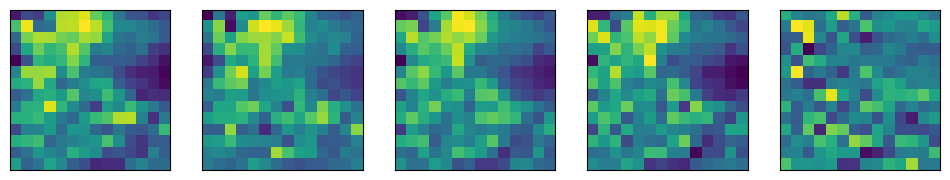

In [15]:
# Plot random 5 convolutional feature maps
import random
random_indexes = random.sample(range(0, 758), k=5) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :] # index on the output tensor of the convolutional layer
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

In [16]:
# Create flatten layer
flatten = nn.Flatten(start_dim=2, # flatten feature_map_height (dimension 2)
                     end_dim=3) # flatten feature_map_width (dimension 3)

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])
Patch embedding sequence shape: torch.Size([1, 196, 768]) -> [batch_size, num_patches, embedding_size]


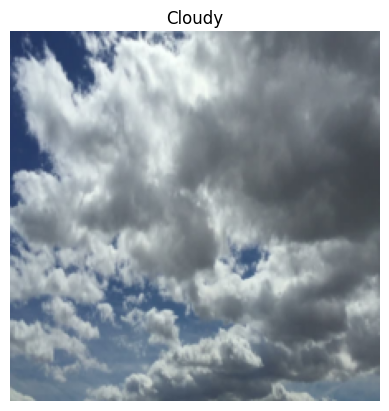

In [17]:
# 1. View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False);
print(f"Original image shape: {image.shape}")

# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape: {image_out_of_conv.shape}")

# 3. Flatten the feature maps
image_out_of_conv_flattened = flatten(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")

# Get flattened image patch embeddings in right shape
image_out_of_conv_flattened_reshaped = image_out_of_conv_flattened.permute(0, 2, 1) # [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]
print(f"Patch embedding sequence shape: {image_out_of_conv_flattened_reshaped.shape} -> [batch_size, num_patches, embedding_size]")

### Building the Vision Transformer Model

The Vision Transformer (ViT) model for this project is implemented from scratch, following the methodology outlined in the seminal paper "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale". This includes building each component layer by layer to replicate the functionality and performance of the original design.

The key components of the model include:

Patch Embedding Layer

The input image is divided into fixed-size patches (e.g., 16x16 pixels). Each patch is flattened and linearly projected into a high-dimensional space with an embedding size of 678 dimensions. This process transforms the image into a sequence of patch embeddings suitable for transformer input.

Position Embedding Layer

To retain positional information, learnable position embeddings are added to the patch embeddings. This ensures that the model captures spatial relationships between patches, even though transformers are inherently order-agnostic. The sequence length is set to 197 (196 patches plus a special [CLS] token for classification).

Encoder Layers

The encoder follows the standard transformer architecture, consisting of multi-head self-attention mechanisms and feed-forward neural networks. Each encoder block includes:

Layer Normalization:

Applied before the attention and feed-forward sub-layers.
mutimat:

Captures dependencies between patches, enabling the model to understand global context.

mutimlp:

Enhances the representation power with linear layers and a non-linear activation function.

Residual Connections:

Add the input to the output of each sub-layer to improve gradient flow and model stability.

The number of embedding dimensions (678) and the sequence length (197) align with the original paper, ensuring a faithful implementation. This modular design facilitates the processing of image data through transformer layers, ultimately enabling robust classification of weather conditions into the four defined categories.

By adhering to the principles and configurations outlined in the Vision Transformer paper, this model is built to leverage the power of transformers for image classification tasks effectively.



In [18]:
class PatchEmbedding(nn.Module):
  def __init__(self,in_channels=3,out_channel=768,patch_size=16,embedding_dim=768,stride=16,padding=0):
    super().__init__()
    self.conv2d=nn.Conv2d(in_channels=in_channels, out_channels=out_channel, kernel_size=patch_size, stride=stride, padding=padding)
    self.flatten=nn.Flatten(2,3)


  def forward(self,x):
    assert x.shape[-1] % patch_size == 0,"it should be intreger"
    x=self.conv2d(x)
    x=self.flatten(x)

    return torch.permute(x, (0, 2, 1))

 In order to perform classification, we use the standard approach of adding an extra learnable
“classification token” to the sequence:


- When a tensor is wrapped as nn.Parameter and assigned as an attribute of an nn.Module, PyTorch automatically registers it as part of the model's parameters.

Next we need to add the position embedding (spatial information):


In [19]:


# 1. Set patch size
patch_size = 16

# 2. Print shape of original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add batch dimension
x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)

# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.randn(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# 8. Create position embedding
number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.randn(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True) # make sure it's learnable

# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


Now we create out muti-head attention block:

In [20]:
class mutihead(nn.Module):
    """
    Implements a Multi-Head Attention Layer with Layer Normalization.

    Args:
        embedding_dimention (int): Dimensionality of the input embeddings. Default is 768.
        num_heads (int): Number of attention heads. Default is 12.
        drop_out (float): Dropout rate applied to the attention weights. Default is 0.0.

    Attributes:
        LayerNorm (nn.LayerNorm): Layer normalization applied to the input embeddings
                                  to stabilize learning and improve training performance.
        attention (nn.MultiheadAttention): Multi-head attention module to compute self-attention
                                           across the input sequence.

    Forward:
        The input tensor `x` is normalized, and self-attention is computed. Only the
        output of the attention mechanism is returned, without the attention weights.

    Returns:
        Tensor: Output of the multi-head attention layer after normalization and attention.
    """
    def __init__(self, embedding_dimention=768, num_heads=12, drop_out=0.0):
        super().__init__()

        # Initialize layer normalization to normalize feature embeddings for each patch.
        self.LayerNorm = nn.LayerNorm(embedding_dimention)

        # Add a multi-head self-attention layer with the specified embedding size, number of heads,
        # and dropout rate. Using batch_first=True ensures the input shape is (batch, sequence, features).
        self.attention = nn.MultiheadAttention(
            embed_dim=embedding_dimention,
            num_heads=num_heads,
            batch_first=True,
            dropout=drop_out
        )

    def forward(self, x):
        """
        Forward pass for the Multi-Head Attention Layer.

        Args:
            x (Tensor): Input tensor of shape (batch_size, sequence_length, embedding_dimention).

        Returns:
            Tensor: Output tensor of shape (batch_size, sequence_length, embedding_dimention).
        """
        # Apply layer normalization to the input tensor.
        x = self.LayerNorm(x)

        # Compute self-attention. The output tensor is obtained as attn_output.
        # We set `need_weights=False` because we do not require attention weights.
        attn_output, _ = self.attention(query=x, key=x, value=x, need_weights=False)

        return attn_output



We also create out muti-NLP layer:

In [21]:
import torch.nn as nn

class mutimlp(nn.Module):
    """
    Implements a Multi-Layer Perceptron (MLP) Layer with Layer Normalization.

    This module is part of the Vision Transformer architecture and is used to capture
    more complex relationships between features by projecting to a higher-dimensional
    space and then back to the original embedding dimension.

    Args:
        embedding_dimention (int): Dimensionality of the input embeddings. Default is 768.
        hidden_size (int): Size of the hidden layer in the MLP block. Default is 3072.
        drop_out (float): Dropout rate applied to the intermediate layers. Default is 0.1.

    Attributes:
        LayerNorm (nn.LayerNorm): Layer normalization applied to stabilize input embeddings
                                  before feeding them into the MLP block.
        block (nn.Sequential): The MLP block consisting of:
            - A fully connected layer projecting the input to the hidden size.
            - A GELU activation for non-linearity.
            - Dropout for regularization.
            - A fully connected layer projecting back to the original embedding dimension.
            - Additional dropout for regularization.

    Forward:
        The input tensor `x` is normalized and passed through the MLP block to extract
        higher-level feature representations.

    Returns:
        Tensor: The output tensor of shape (batch_size, sequence_length, embedding_dimention).
    """
    def __init__(self, embedding_dimention=768, hidden_size=3072, drop_out=0.1):
        super().__init__()

        # Initialize layer normalization to normalize feature embeddings for each patch.
        self.LayerNorm = nn.LayerNorm(embedding_dimention)

        # Define the MLP block using nn.Sequential:
        # 1. Project the input from the embedding dimension to a larger hidden size.
        # 2. Apply the GELU activation for better gradient flow and non-linearity.
        # 3. Use Dropout to prevent overfitting.
        # 4. Project the hidden size back to the original embedding dimension.
        # 5. Apply another Dropout for further regularization.
        self.block = nn.Sequential(
            nn.Linear(embedding_dimention, hidden_size),
            nn.GELU(),
            nn.Dropout(p=drop_out),
            nn.Linear(hidden_size, embedding_dimention),
            nn.Dropout(p=drop_out)
        )

    def forward(self, x):
        """
        Forward pass for the MLP Layer.

        Args:
            x (Tensor): Input tensor of shape (batch_size, sequence_length, embedding_dimention).

        Returns:
            Tensor: Output tensor of shape (batch_size, sequence_length, embedding_dimention).
        """
        # Apply layer normalization to the input tensor.
        x = self.LayerNorm(x)

        # Pass the normalized input through the MLP block.
        x = self.block(x)

        return x

Encoder:

We have encoder to learn the representation by turning a sequence patch into learnt representations


In [22]:

class Encoder_block(nn.Module):
  def __init__(self,embedding_dimention=768,hidden_size=3072,num_head=12,drop_out=0.1):
    super().__init__()
    self.MAP=mutihead(embedding_dimention,num_head,drop_out=0.0)
    self.MLP=mutimlp(embedding_dimention,hidden_size,drop_out=0.1)

  def forward(self,x):
    output_1=self.MAP(x)+x  #add the residue connection for the block
    output_2=self.MLP(output_1)+output_1

    return output_2



We can visualize our models using summary:

In [23]:
!pip install -q torchinfo

In [68]:
from torchinfo import summary

In [89]:

class Vision_transformer(nn.Module):
    """
    Implements the Vision Transformer (ViT) architecture for image classification.

    Args:
        in_channel (int): Number of input channels in the image (e.g., 3 for RGB images). Default is 3.
        image_size (int): Size of the input image (assumes square images). Default is 224.
        patch_size (int): Size of each patch extracted from the image. Default is 16.
        embedding_dimention (int): Dimensionality of the patch embeddings. Default is 768.
        hidden_size (int): Size of the hidden layer in the MLP block of the transformer encoder. Default is 3072.
        num_head (int): Number of attention heads in the multi-head attention mechanism. Default is 12.
        drop_out (float): Dropout rate applied to various layers. Default is 0.1.
        class_num (int): Number of classes for classification. Default is the length of `class_names`.
        num_encode (int): Number of transformer encoder blocks. Default is 12.

    Attributes:
        N (int): Total number of patches in the image.
        patch_embedding (PatchEmbedding): Module to convert image patches into patch embeddings.
        class_embedding_token (nn.Parameter): Learnable embedding for the class token.
        position_embedding_token (nn.Parameter): Learnable positional embeddings added to patch and class tokens.
        encoder_12 (nn.Sequential): Stack of transformer encoder blocks.
        head (nn.Sequential): Final classification head consisting of a layer normalization and linear layer.
        dropout (nn.Dropout): Dropout layer applied after adding positional embeddings.

    Forward:
        The input image `x` is divided into patches, embedded into feature vectors, and combined with a class token.
        Positional embeddings are added to provide spatial information, and the resulting sequence is processed
        through the transformer encoder blocks. The class token output is passed through the classification head
        to predict the class.

    Returns:
        Tensor: Logits for each class of shape (batch_size, class_num).
    """
    def __init__(self, in_channel=3, image_size=224, patch_size=16, embedding_dimention=768, hidden_size=3072, num_head=12, drop_out=0.1, class_num=len(class_names), num_encode=12):
        super().__init__()

        # Ensure the image size is divisible by the patch size
        assert image_size % patch_size == 0, "Image size must be divisible by patch size"

        # Total number of patches in the image
        self.N = (image_size * image_size) // (patch_size ** 2)

        # Patch embedding layer: Converts image patches into feature embeddings
        self.patch_embedding = PatchEmbedding(
            in_channels=in_channel,
            patch_size=patch_size,
            embedding_dim=embedding_dimention
        )

        # Learnable class token: Used for classification
        self.class_embedding_token = nn.Parameter(data=torch.randn(1, 1, embedding_dimention))

        # Learnable positional embeddings: Added to provide spatial information to patch embeddings
        self.position_embedding_token = nn.Parameter(data=torch.randn(1, self.N + 1, embedding_dimention))

        # Stack of transformer encoder blocks: Processes the sequence of embeddings
        self.encoder_12 = nn.Sequential(
            *[Encoder_block(embedding_dimention, hidden_size, num_head, drop_out) for _ in range(num_encode)]
        )

        # Classification head: Normalizes and projects the class token for final prediction
        self.head = nn.Sequential(
            nn.LayerNorm(embedding_dimention),
            nn.Linear(embedding_dimention, class_num)
        )

        # Dropout layer for regularization
        self.dropout = nn.Dropout(drop_out)

    def forward(self, x):
        """
        Forward pass for the Vision Transformer.

        Args:
            x (Tensor): Input image tensor of shape (batch_size, in_channel, image_size, image_size).

        Returns:
            Tensor: Output logits of shape (batch_size, class_num).
        """
        batch_size = x.shape[0]

        # Pass the input through the patch embedding layer
        x = self.patch_embedding(x)

        # Expand the class token to match the batch size and concatenate it with patch embeddings
        class_embedding_token = self.class_embedding_token.expand(batch_size, -1, -1)
        x = torch.cat((class_embedding_token, x), dim=1)

        # Add positional embeddings to the combined sequence
        x = self.position_embedding_token + x

        # Apply dropout after adding positional embeddings
        x = self.dropout(x)

        # Pass the sequence through the stack of transformer encoder blocks
        x = self.encoder_12(x)

        # Use only the class token (first token) for classification
        x = self.head(x[:, 0, :])

        return x

In [90]:
vit=Vision_transformer()
vit

Vision_transformer(
  (patch_embedding): PatchEmbedding(
    (conv2d): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (encoder_12): Sequential(
    (0): Encoder_block(
      (MAP): mutihead(
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (MLP): mutimlp(
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (block): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (1): Encoder_block(
      (MAP): mutihead(
        (LayerNorm): LayerNorm((768,), eps=1e-05, 

In [91]:
summary(model=Vision_transformer(),input_size=(1,3,224,224),col_names=["input_size","output_size","num_params","trainable"],
        col_width=15,
        row_settings=["var_names"])

Layer (type (var_name))                                 Input Shape     Output Shape    Param #         Trainable
Vision_transformer (Vision_transformer)                 [1, 3, 224, 224] [1, 4]          152,064         True
├─PatchEmbedding (patch_embedding)                      [1, 3, 224, 224] [1, 196, 768]   --              True
│    └─Conv2d (conv2d)                                  [1, 3, 224, 224] [1, 768, 14, 14] 590,592         True
│    └─Flatten (flatten)                                [1, 768, 14, 14] [1, 768, 196]   --              --
├─Dropout (dropout)                                     [1, 197, 768]   [1, 197, 768]   --              --
├─Sequential (encoder_12)                               [1, 197, 768]   [1, 197, 768]   --              True
│    └─Encoder_block (0)                                [1, 197, 768]   [1, 197, 768]   --              True
│    │    └─mutihead (MAP)                              [1, 197, 768]   [1, 197, 768]   2,363,904       True
│    │    └─m

### Train our model 1 (from scatch and without pretrained weight):

In [92]:
loss_fn=torch.nn.CrossEntropyLoss()
loss_fn

optimizer=torch.optim.Adam(params=vit.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-03, weight_decay=0.1)

In [93]:

#we make our training and test loop function

def one_epoch_training(model,optimizer,train_dataloader=train_dataloader,test_dataloader=test_dataloader,device=device):
  model.to(device)
  model.train()
  running_lost=0
  train_acc=0

  total_test_lost=0
  total_test_acc=0

  for batch,(data_x,labels) in enumerate(train_dataloader):
    #set the gradident caluclation is zero for every batch
    optimizer.zero_grad()
    #input should be (batch,1,2,3..k dimention)
    logit_outputs=model(data_x.to(device))


    #compute the lost for each batch
    loss=loss_fn(logit_outputs, labels.to(device))
    loss.backward()
    #compute average
    acc=sum(logit_outputs.argmax(-1)==labels.to(device)).item()
    train_acc=train_acc+acc

    #save the loss into the running_lost:
    running_lost=running_lost+loss
    #we change the weight for each batches
    optimizer.step()


  model.eval()
  #turn off the drpop out or lynorm

  with torch.no_grad():
    for i, (data_x,labels) in enumerate(test_dataloader):
      logit_outputs=model(data_x.to(device))
      #compute the lost for each batch
      test_loss=loss_fn(logit_outputs, labels.to(device))
      #store the total lost
      total_test_lost=total_test_lost+test_loss

      #compute the acc for each batch
      acc=sum(logit_outputs.argmax(-1)==labels.to(device)).item()
      total_test_acc=total_test_acc+acc

  #we have total loss for one epoches (in all batch)
  print (f"Training_loss {running_lost/len((train_dataloader))}| Testing_loss{total_test_lost/len((test_dataloader))} |Training_acc {train_acc/len(train_data)}| testing_acc{total_test_acc/len(test_data)}")
  return running_lost/len((train_dataloader)),total_test_lost/len((test_dataloader)),train_acc/len(train_data),total_test_acc/len(test_data)





In [94]:
Epoch=5

Result={"train_loss":[],"test_loss":[],"train_acc":[],"test_acc":[],}
for i in range(Epoch):

  print (f"we are in epoch {i+1}")
  train_loss,test_loss,train_acc,test_acc=one_epoch_training(model=vit,optimizer=optimizer)
  Result["train_loss"].append(train_loss.cpu().item())
  Result["test_loss"].append(test_loss.cpu().item())
  Result["train_acc"].append(train_acc)
  Result["test_acc"].append(test_acc)



we are in epoch 1
Training_loss 1.7933961153030396| Testing_loss0.945118248462677 |Training_acc 0.484375| testing_acc0.600896860986547
we are in epoch 2
Training_loss 0.88217693567276| Testing_loss0.7906762361526489 |Training_acc 0.6160714285714286| testing_acc0.695067264573991
we are in epoch 3
Training_loss 0.7553367018699646| Testing_loss0.7604488730430603 |Training_acc 0.6852678571428571| testing_acc0.6995515695067265
we are in epoch 4
Training_loss 0.7377411723136902| Testing_loss0.9014800190925598 |Training_acc 0.6830357142857143| testing_acc0.6143497757847534
we are in epoch 5
Training_loss 0.7845317721366882| Testing_loss0.879960834980011 |Training_acc 0.6618303571428571| testing_acc0.5919282511210763


We might need to do a pre-trained model because out performance is not really good. We can see the accuracy is around 0.6.

### Train our model 2 (with pretrained weight):



source: https://pytorch.org/vision/stable/models.html
https://pytorch.org/vision/stable/models.html

In [95]:
pre_vit=torchvision.models.vit_b_16(weights=torchvision.models.ViT_B_16_Weights.DEFAULT).to(device)

for parameter in pre_vit.parameters():
    parameter.requires_grad = False

pre_vit.heads=nn.Linear(768,4)

transforms=torchvision.models.ViT_B_16_Weights.DEFAULT.transforms()
transforms


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [96]:
summary(model=pre_vit,input_size=(1,3,224,224),col_names=["input_size","output_size","num_params","trainable"],
        col_width=15,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape     Output Shape    Param #         Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224] [1, 4]          768             Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224] [1, 768, 14, 14] (590,592)       False
├─Encoder (encoder)                                          [1, 197, 768]   [1, 197, 768]   151,296         False
│    └─Dropout (dropout)                                     [1, 197, 768]   [1, 197, 768]   --              --
│    └─Sequential (layers)                                   [1, 197, 768]   [1, 197, 768]   --              False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]   [1, 197, 768]   (7,087,872)     False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]   [1, 197, 768]   (7,087,872)     False
│    │    └─EncoderBlock (encoder_layer_2)                   [1, 197, 768]

Load our dataset:

In [97]:
Dataset=datasets.ImageFolder(root="/content/Multi-class Weather Dataset",transform=transforms)


train_data, test_data = torch.utils.data.random_split(Dataset, [0.8,0.2])


# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader2 = DataLoader(dataset=train_data,
                              batch_size=32, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader2 = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader2, test_dataloader2

loss_fn=torch.nn.CrossEntropyLoss()
loss_fn

optimizer2=torch.optim.Adam(params=pre_vit.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-03, weight_decay=0.1)


In [98]:
Epoch=5
Result2={"train_loss":[],"test_loss":[],"train_acc":[],"test_acc":[],}
for i in range(Epoch):

  print (f"we are in epoch {i+1}")
  train_loss,test_loss,train_acc,test_acc=one_epoch_training(model=pre_vit,optimizer=optimizer2,train_dataloader=train_dataloader2,test_dataloader=test_dataloader2)
  Result2["train_loss"].append(train_loss.cpu().item())
  Result2["test_loss"].append(test_loss.cpu().item())
  Result2["train_acc"].append(train_acc)
  Result2["test_acc"].append(test_acc)


we are in epoch 1
Training_loss 0.66250079870224| Testing_loss0.35348036885261536 |Training_acc 0.8147321428571429| testing_acc0.9237668161434978
we are in epoch 2
Training_loss 0.23482826352119446| Testing_loss0.23137065768241882 |Training_acc 0.9497767857142857| testing_acc0.9551569506726457
we are in epoch 3
Training_loss 0.16748736798763275| Testing_loss0.2052382081747055 |Training_acc 0.9654017857142857| testing_acc0.9551569506726457
we are in epoch 4
Training_loss 0.14099450409412384| Testing_loss0.19120773673057556 |Training_acc 0.9754464285714286| testing_acc0.9551569506726457
we are in epoch 5
Training_loss 0.1274934858083725| Testing_loss0.1843894124031067 |Training_acc 0.9787946428571429| testing_acc0.9551569506726457


## Result:

In this part we will plot our result:

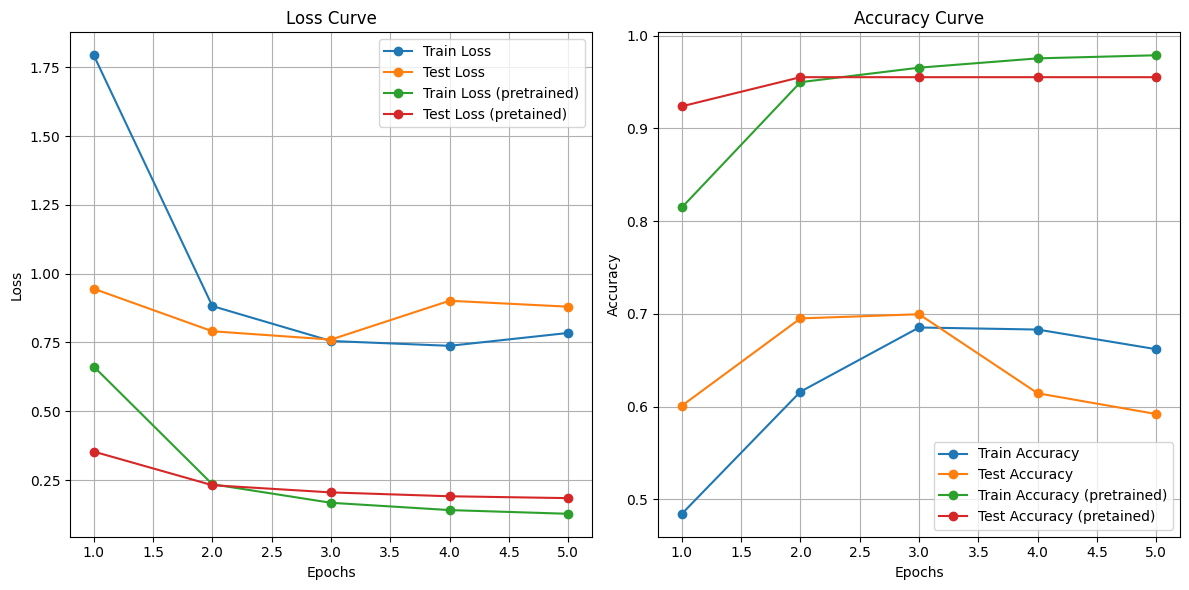

In [103]:
import matplotlib.pyplot as plt

# Extract data from Result1 and 2
train_loss = Result["train_loss"]
test_loss = Result["test_loss"]
train_acc = Result["train_acc"]
test_acc= Result["test_acc"]

train_loss2 = Result2["train_loss"]
test_loss2 = Result2["test_loss"]
train_acc2 = Result2["train_acc"]
test_acc2= Result2["test_acc"]

# Create a range for the x-axis representing epochs
epochs = range(1, len(train_loss2) + 1)




# Plot loss curves
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, test_loss, label='Test Loss', marker='o')

plt.plot(epochs, train_loss2, label='Train Loss (pretrained)', marker='o')
plt.plot(epochs, test_loss2, label='Test Loss (pretained)', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, test_acc, label='Test Accuracy', marker='o')

plt.plot(epochs, train_acc2, label='Train Accuracy (pretrained)', marker='o')
plt.plot(epochs, test_acc2, label='Test Accuracy (pretained)', marker='o')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

## Result Analysis and dicussion:

The results from training the Vision Transformer model are presented for two configurations: Model 1 (without pretraining) and Model 2 (with pretraining). A comparative analysis reveals the impact of pretraining on performance and the ability of the model to generalize.


Model 1: Without Pretraining

Training Performance

In the first epoch, the model achieves a training accuracy of 48.4% with a high training loss of 1.79.
By epoch 3, training accuracy improves to 68.5%, and training loss decreases significantly to 0.75, indicating that the model is learning to represent the training data.
However, in later epochs, the training accuracy declines, ending at 66.2% in epoch 5, suggesting that the model struggles to consistently optimize its learning objectives.
Testing Performance
Testing accuracy starts at 60.1% in epoch 1 and reaches its peak of 69.6% in epoch 2.
After epoch 2, testing accuracy stagnates and declines, ending at 59.2% in epoch 5. Simultaneously, testing loss increases from 0.76 in epoch 3 to 0.88 in epoch 5.
This pattern suggests potential overfitting, where the model fits the training data well but fails to generalize effectively to unseen data (but the model still has capacity to predict some of the images).
Observation
The model trained from scratch demonstrates moderate learning capability in the early stages. However, it suffers from overfitting as training progresses. One of the reason that the model didnt perform too well is likely due to the lack of data and time to train a better model. In the real case they use millions of data but we just use thousands. That is why the model didnt perform well but clearly the model is still good as the accuracy is around 0.6.


Model 2: With Pretraining

Training Performance
In the first epoch, the model achieves a significantly higher training accuracy of 81.5% with a lower training loss of 0.66, reflecting the advantages of pretrained feature representations.
Training accuracy continues to improve steadily, reaching 97.9% by epoch 5. Correspondingly, training loss decreases to 0.127, indicating effective learning and optimization on the training data.
Testing Performance
Testing accuracy starts high at 92.4% in epoch 1 and improves to 95.5% in epoch 2. It remains consistent at this level through to epoch 5.
Testing loss decreases progressively, ending at 0.18 in epoch 5, which demonstrates excellent generalization to unseen data.
Observation
Pretraining enables the model to leverage strong feature extraction capabilities, allowing it to focus on task-specific learning. This results in faster convergence, higher overall accuracy, and better generalization. The consistent performance across both training and testing sets highlights the effectiveness of pretraining for deep learning tasks.